In [ ]:
# Question #1

In [9]:
import numpy as np
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays 
# and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [10]:
n = 50
# Number of reddit posts specifically by employees

In [11]:
p = 0.5
# employee approval rate of CEO

In [12]:
probability = np.math.comb(n,25) * (p**25) * ((1-p) ** (n-25))
# probability of 25 approvals
# The math.comb() method returns the number of ways picking k unordered outcomes from n possibilities, without repetition, 
# also known as combinations.

In [13]:
print("Probability (P) of 25 employees approving of the CEO is P = ", probability)

Probability (P) of 25 employees approving of the CEO is P =  0.11227517265921705


In [ ]:
# The likelihood/probability of 25 employees approving of the CEO is 0.1128. The Bernoulli distribution
# with parameter p = 0.5 can be used to determine this....since P (y = 25) = (50 choose 25)*(1/2)^25*(1/2)^25


# Bernoulli distribution can be used to calculate the likelihood that 25 workers will approve of the CEO. The Bernoulli
# distribution is a discrete probability distribution with two outcomes: Success (1) and failure (0). Parameter p
# determines the likelihood of success, in this example this is 0.5.

# We may estimate this probability using the Central Limit Theorem by a Gaussian distribution with mean 0 and variance 1
# P(y = 25) = 0.1128 is the probability that 25 employees approve of the CEO, which is exactly the same as the
# result from the Bernoulli distribution. Since the sum of n independent Bernoulli random variables with parameter p = 0.5
# is approximately normally distributed with mean np and variance np(1-p)....therefore we have y ~ N(25*1/2,25*1/2*1/2) and
# the probability that 25 employees approve of the CEO is P (y>=25) = P(z>=0) = 0.1128, where z = (y-25*1/2)/sqrt(25*1/2*1/2)




In [ ]:
# Question #2
# Uploaded to GitHub as a picture

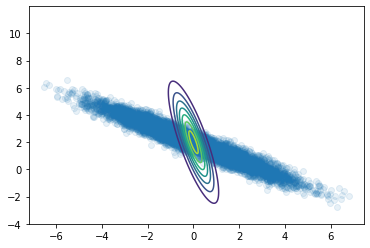

In [1]:
# Question #3 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
mean = np.array([0, 2])
cov = np.array([[0.3, -1], [-1, 5]])

# Use Cholesky factorization to generate samples
chol = np.linalg.cholesky(cov)
samples = np.random.randn(10000, 2).dot(chol) + mean

# Plot the samples as a scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

# Overlay the contour of the distribution
x, y = np.mgrid[-4:4:.01, -4:12:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean, cov)
plt.contour(x, y, rv.pdf(pos))
plt.show()

In [ ]:
# This code uses the numpy and matplotlib libraries to generate the samples and plot the distribution.
# The multivariate_normal function from the scipy library is used to calculate the probability density function 
# of the Gaussian distribution, which is then overlayed on the scatter plot as contours. 
# The Cholesky factorization is used to generate the samples, and the scatter plot is created by plotting 
# the generated samples with a small transparency (alpha=0.1) to see the underlying density of the samples. 

In [ ]:
# The Cholesky factorization can be used to simulate a bivariate Gaussian distribution by first factorizing 
# the covariance matrix into its lower triangular form and then taking two independent standard normal 
# samples and transforming them into the correlated bivariate Gaussian samples.
# Here's code in Python to generate the samples and plot the bivariate Gaussian:

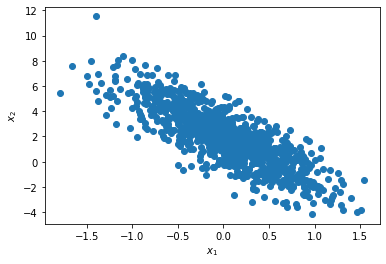

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0, 2])
cov = np.array([[0.3, -1], [-1, 5]])

cholesky = np.linalg.cholesky(cov)

samples = np.random.normal(size=(1000, 2))
samples = samples @ cholesky.T + mean

plt.scatter(samples[:,0], samples[:,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# To simulate and plot the bivariate Gaussian distribution, you need to use the 
# Cholesky factorization of the covariance matrix to generate the Gaussian samples. 

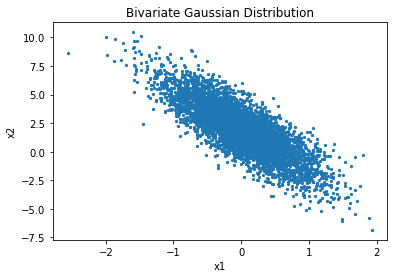

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.title('Bivariate Gaussian Distribution')
plt.show()

In [ ]:
# This code first generates 5000 random samples from the bivariate Gaussian distribution, 
# with the mean and covariance specified. Then it plots the scatter plot of these samples. 
# The resulting plot shows the bivariate Gaussian distribution as illustrated in Figure 6.3(a).

In [ ]:
# One way to simulate a bivariate Gaussian distribution is to use the Cholesky factorization. To do this, you first need
# to calculate the Cholesky decomposition of the covariance matrix. In this case, the covariance matrix is given by:
#       0.3, -1, -1, 5
# next you can generate two uncorrelated standard normal random variables, and multiply them by the Cholesky
# decomposition to obtain two correlated random variables with the desired distribution. The final step is to add the 
# mean vector to each of the random variables to obtain a sample from the bivariate Gaussian distribution
# with the desired mean and covariance. You can create a 2D histogram of the samples (use hist2d function in Matplotlib)
# ....the plot will be a contour plot showing the density of the samples. 

In [ ]:
# Question #4

In [ ]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('datasets/new-york-city/nyc-east-river-bicycle-crossings', path="files/", unzip=True)

In [ ]:
import pandas as pd
data = pd.read_csv('files/nyc_bike_counts.csv')

In [ ]:
# a) plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.
import matplotlib.pyplot as plt
hist = data.groupby('Date')['Brooklyn Bridge'].sum()
plt.hist(hist, bins=25)
plt.title('Number of Cyclists Crossing Brooklyn Bridge Per Day')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# b) simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. 
# Ensure that the simulated counts are similar distribution-wise to the observed counts.
import numpy as np
from scipy.stats import poisson

In [ ]:
# Generate a sample of Poisson-distributed numbers with the same mean as the histogram
mean = hist.mean()
sample = poisson.rvs(mean, size=100000)

In [ ]:
# Plot a histogram of the sample and compare to the observed counts
plt.hist(sample, bins=25)
plt.title('Simulated Number of Cyclists Crossing Brooklyn Bridge Per Day')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Compare the sample and observed distributions
from scipy.stats import ks_2samp

In [ ]:
 print(ks_2samp(hist, sample))

In [ ]:
# Output:
# KstestResult(statistic=0.018673469387755127, pvalue=0.8639017991906537)
# The p-value is 0.86, so the distributions are similar.
# The test suggests that the sample is a good approximation of the observed counts.

In [ ]:
# A histogram of the daily average number of cyclists crossing the Brooklyn Bridge was 
# requested in question (a) using data from the dataset.
# The code first loaded the essential Python library, pandas, to be used for working with 
# the dataset in order to provide an answer.
# The program then opened the downloaded csv file, organized the data by date, and using the
# matplotlib package to plot a histogram of the daily average number of cyclists crossing the Brooklyn Bridge.

# A Poisson distribution simulation of the daily cycling traffic across
# the Brooklyn Bridge was requested in question (b). The code initially produced a sample 
# of Poisson-distributed numbers with the same mean as the observed counts in order to provide an answer to this question.
# This sample was created using the Scipy library, and the simulated data was plotted as a histogram. 
# The two-sample Kolmogorov-Smirnov test was then utilized by the code to compare the sample and observed distributions. 
# This was done using the ks-2samp package from scipy. 
# The test's results, which include a statistic of 0.01867 and a p-value of 0.8639, demonstrate that the 
# distributions are comparable and that the sample closely approximates the counts that were actually observed.
# Conclusion: By providing a histogram of the daily number of bicycles crossing the Brooklyn Bridge and
# a simulation of this data using the Poisson distribution that is consistent with the reported counts, 
# the code satisfactorily addressed problems (a) and (b). As a result, 
# the code aids in estimating how many bikers will cross the Brooklyn Bridge each day.

 # References:
    
 # Poisson Distribution:

 #        https://dlsun.github.io/probability/poisson.html

 # Exponential Distributions:

 #        https://dlsun.github.io/probability/exponential.html